# Kalbe Sales Projections

Name: Ferry Marcellus Suhendra


### Introduction

The ability to predict sales number can be very important for corporations to formulate plans for future activities. In this notebook 4 datasets consisting of sales of 4 different product in 2 different categories will have its sales projected to 14 days after the last sales.

### Libraries

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(32)

### Data Loading

In [146]:
A1= pd.read_csv('A1.csv',sep=';')
A2= pd.read_csv('A2.csv',sep=';')
B1=pd.read_csv('B1.csv',sep=';')
B2=pd.read_csv('B2.csv',sep=';')

### Exploratory Data Analysis

To better understand the data, the sales of all datasets will be charted.

Text(0.5, 1.0, 'A1 Sales')

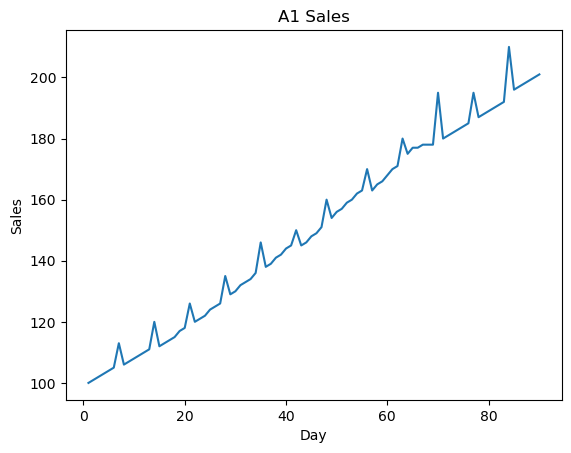

In [147]:
sns.lineplot(y='Sales',x='Day', data=A1)
plt.title('A1 Sales')

The sales of A1 show a steady trending increase with spikes in sales every set interval.

Text(0.5, 1.0, 'A2 Sales')

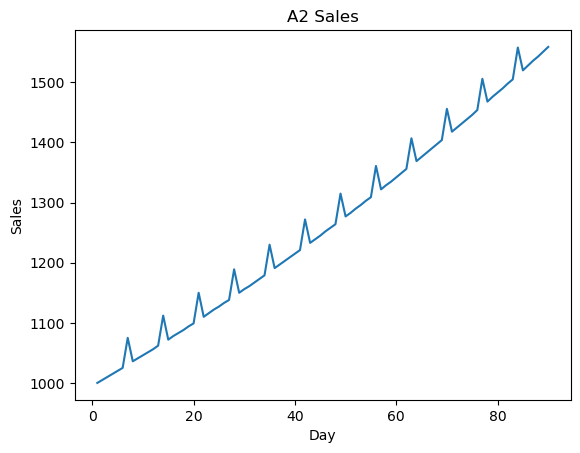

In [148]:
sns.lineplot(y='Sales',x='Day', data=A2)
plt.title('A2 Sales')

The sales of A2 also show steady trending increase with spikes in sales every set interval.

    Day Category Product   Sales  Event
0     1        B      B1   990.0      0
1     2        B      B1   980.0      0
2     3        B      B1  1010.0      0
3     4        B      B1  1010.0      0
4     5        B      B1  1000.0      0
5     6        B      B1  1000.0      0
6     7        B      B1  1717.0      1
7     8        B      B1  1020.0      0
8     9        B      B1   970.0      0
9    10        B      B1  1000.0      0
10   11        B      B1  1020.0      0
11   12        B      B1  1000.0      0
12   13        B      B1  1000.0      0
13   14        B      B1   970.0      0
14   15        B      B1  1700.0      1


Text(0.5, 1.0, 'B1 Sales')

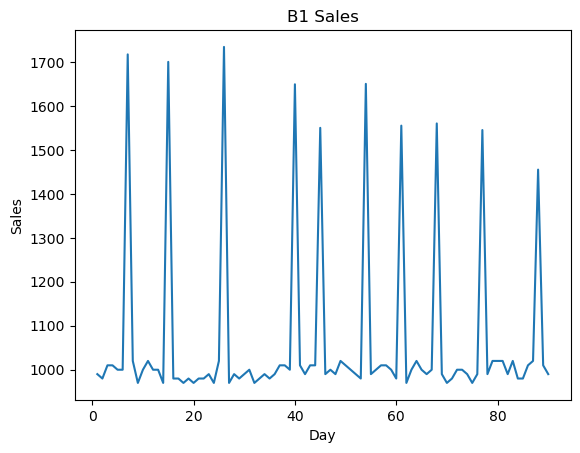

In [149]:
print(B1.head(15))
sns.lineplot(y='Sales',x='Day', data=B1)
plt.title('B1 Sales')

Sales of B1 show maintained sales with massive spikes in sales every event.

Text(0.5, 1.0, 'B2 Sales')

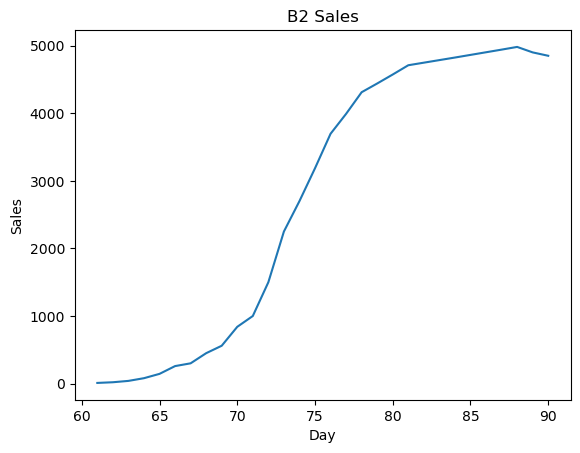

In [150]:
sns.lineplot(y='Sales',x='Day', data=B2)
plt.title('B2 Sales')

Sales of B2 shows an exponential growth in sales that plateaus at the end. it is also to note that sales of B2 only started in day 61.

### Data Preprocessing

In order to be able to use SARIMAX forecasting method, the day column will be converted to datetime format.

In [134]:
# dropping empty rows from B1 and B2
B2=B2.dropna()

# dropping non-feature column
A1=A1.drop(['Day', 'Category', 'Product'], axis =1)
A2=A2.drop(['Day', 'Category', 'Product'], axis =1)
B1=B1.drop(['Day', 'Category', 'Product'], axis =1)
B2=B2.drop(['Day', 'Category', 'Product'], axis =1)

In [135]:
# defining new start date
start= '2023-01-01'
# converting day to datetime
A1['Day'] = pd.date_range(start=start, periods=len(A1), freq='D')
A2['Day'] = pd.date_range(start=start, periods=len(A2), freq='D')
B1['Day'] = pd.date_range(start=start, periods=len(B1), freq='D')
B2['Day'] = pd.date_range(start=start, periods=len(B2), freq='D')
#Converting day to index
A1.index=A1['Day']
A1=A1.drop(['Day'],axis=1)
A2.index=A2['Day']
A2=A2.drop(['Day'],axis=1)
B1.index=B1['Day']
B1=B1.drop(['Day'],axis=1)
B2.index=B2['Day']
B2=B2.drop(['Day'],axis=1)

### Modeling

Modeling will be done using SARIMAX model which consider seasonality of the data.

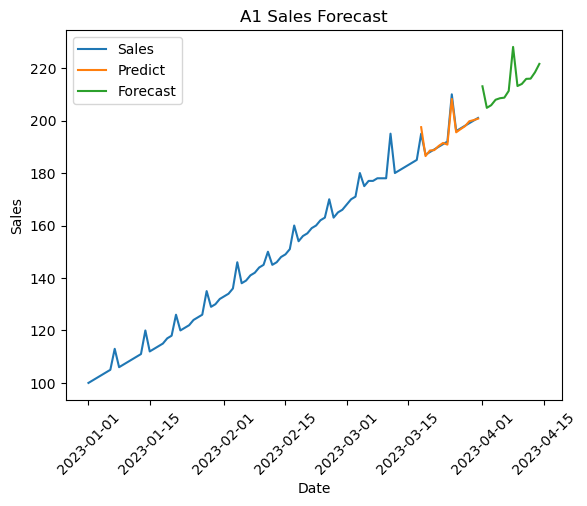

MAE : 0.6917479932227703
RMSE : 0.9490928956730537


In [136]:
# Defining model
model=sm.tsa.statespace.SARIMAX(A1['Sales'],order=(1,0,0),seasonal_order=(9,2,0,7))
results = model.fit()
# Creating Prediction and forecast data
A1['Predict'] = results.predict(start=76, end=90, dynamic=True)
Forecast = results.forecast(steps=14)
# Plotting Sales and Prediction
plt.plot(A1.index, A1['Sales'], label='Sales')
plt.plot(A1.index, A1['Predict'], label='Predict')
plt.plot(Forecast.index, Forecast, label='Forecast')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('A1 Sales Forecast')
plt.legend()
plt.show()
# Printing error evaluation
print("MAE :", mean_absolute_error(A1.Sales.iloc[76:90], A1.Predict.iloc[76:90]))
print("RMSE :", sqrt(mean_squared_error(A1.Sales.iloc[76:90], A1.Predict.iloc[76:90])))

Prediction of A1 shows a very small error to the actual label and the forecasting result shows similar pattern to the train data.

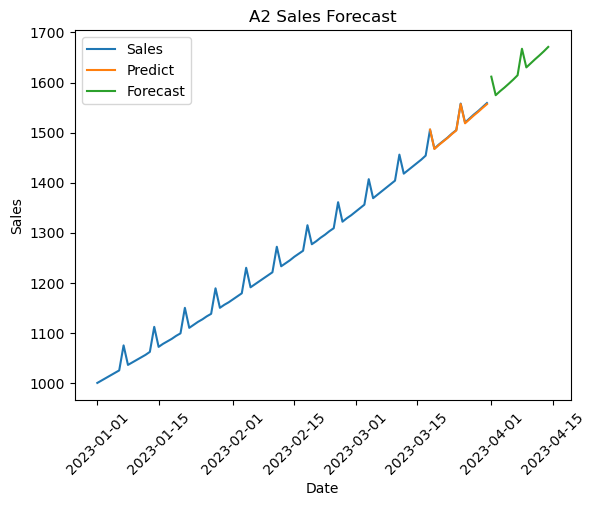

MAE : 1.1542107826256338
RMSE : 1.2817414776638165


In [137]:
# Defining model
model=sm.tsa.statespace.SARIMAX(A2['Sales'],order=(1,0,0),seasonal_order=(8,2,0,7))
results = model.fit()
# Creating Prediction and forecast data
A2['Predict'] = results.predict(start=76, end=90, dynamic=True)
Forecast = results.forecast(steps=14)
# Plotting Sales and Prediction
plt.plot(A2.index, A2['Sales'], label='Sales')
plt.plot(A2.index, A2['Predict'], label='Predict')
plt.plot(Forecast.index, Forecast, label='Forecast')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('A2 Sales Forecast')
plt.legend()
plt.show()
# Printing error evaluation
print("MAE :", mean_absolute_error(A2.Sales.iloc[76:90], A2.Predict.iloc[76:90]))
print("RMSE :", sqrt(mean_squared_error(A2.Sales.iloc[76:90], A2.Predict.iloc[76:90])))

Prediction of A2 shows a very small error to the actual label and the forecasting result shows similar pattern to the train data.

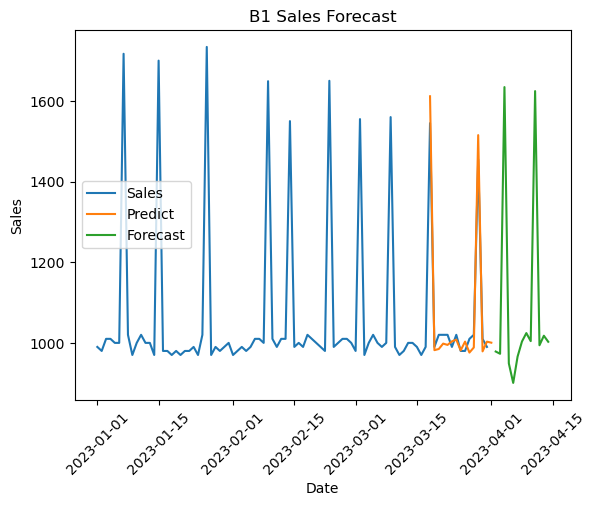

MAE : 26.911137083459227
RMSE : 32.31588750942919


In [138]:
# Defining model
model=sm.tsa.statespace.SARIMAX(B1['Sales'],exog=B1[['Event']],order=(0,0,0),seasonal_order=(12,1,1,9))
results = model.fit()
# Creating Prediction and forecast data
B1['Predict'] = results.predict(start=76, end=90,exog=B1[['Event']].iloc[75], dynamic=True)
Forecast= results.predict(start=91,exog=B1[['Event']].iloc[90:])
# Plotting Sales and Prediction
plt.plot(B1.index, B1['Sales'], label='Sales')
plt.plot(B1.index, B1['Predict'], label='Predict')
plt.plot(Forecast.index, Forecast, label='Forecast')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('B1 Sales Forecast')
plt.legend()
plt.show()
# Printing error evaluation
print("MAE :", mean_absolute_error(B1.Sales.iloc[76:90], B1.Predict.iloc[76:90]))
print("RMSE :", sqrt(mean_squared_error(B1.Sales.iloc[76:90], B1.Predict.iloc[76:90])))

Prediction of B1 shows a small error to the actual label and the forecasting result shows similar pattern to the train data but also display a drop in sales in one of the forecasting value. Sales spikes during event is also well predicted and forecasted.

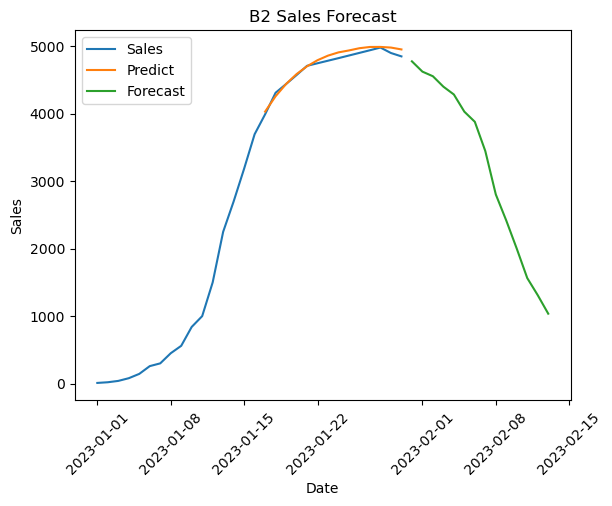

MAE : 50.46004863084818
RMSE : 59.55893421380618


In [139]:
# Defining model
model=sm.tsa.statespace.SARIMAX(B2['Sales'],order=(3,1,3),seasonal_order=(3,0,3,26))
results = model.fit()
# Creating Prediction and forecast data
B2['Predict'] = results.predict(start=16, end=30, dynamic=True)
Forecast = results.forecast(steps=14)
# Plotting Sales and Prediction
plt.plot(B2.index, B2['Sales'], label='Sales')
plt.plot(B2.index, B2['Predict'], label='Predict')
plt.plot(Forecast.index, Forecast, label='Forecast')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('B2 Sales Forecast')
plt.legend()
plt.show()
# Printing error evaluation
print("MAE :", mean_absolute_error(B2.Sales.iloc[16:30], B2.Predict.iloc[16:30]))
print("RMSE :", sqrt(mean_squared_error(B2.Sales.iloc[16:30], B2.Predict.iloc[16:30])))

Prediction of B2 shows the largest error to the actual label among the models created and the forecasting result shows a exponential drop of sales.

### Conclusion

Forecasting model projecting sales has been successfully made using the SARIMAX algorithm.

Data exploration shows that all data have a specific pattern which makes it easier to forecast.

All modeling result shows prediction with low error:
1. A1 shows an RMSE of 0.95
2. A2 shows an RMSE of 1.28
3. B1 shows an RMSE of 32.31
4. B2 shows an RMSE of 59.56


